In [58]:
import pandas as pd
import numpy as np
from scipy import stats
import csv
import matplotlib.pyplot as plt

### Data process

In [8]:
# Convert text competitive rating to numerical 
competitive_mapping = {
'Extremely uncompetitive': 1,
'Uncompetitive': 2,
'Somewhat uncompetitive': 3, 
'Neutral (neither competitive nor uncompetitive)':4,
'Somewhat competitive': 5,
'Competitive': 6,
'Extremely competitive': 7
}

groud_truth_gender = {
'letter1': 'Female',
'letter2': 'Female',
'letter3': 'Female',
'letter4': 'Male'
}

ground_truth_writer_gender = {
'letter1': 'Male',
'letter2': 'Male',
'letter3': 'Male',
'letter4': 'Male'
}

ground_truth_strength = {
'letter1': 'Weak',
'letter2': 'Weak',
'letter3': 'Strong',
'letter4': 'Strong'
}

In [35]:
df1 = pd.read_excel('Responses/letter1_control.xlsx')  
df2 = pd.read_excel('Responses/letter1_mitigation.xlsx') 
df3 = pd.read_excel('Responses/letter2_control.xlsx') 
df4 = pd.read_excel('Responses/letter2_mitigation.xlsx') 
df5 = pd.read_excel('Responses/letter3_control.xlsx') 
df6 = pd.read_excel('Responses/letter3_mitigation.xlsx') 
df7 = pd.read_excel('Responses/letter4_control.xlsx') 
df8 = pd.read_excel('Responses/letter4_mitigation.xlsx') 

df1['actual_gender'] = 'Female'
df2['actual_gender'] = 'Female'
df3['actual_gender'] = 'Female'
df4['actual_gender'] = 'Female'
df5['actual_gender'] = 'Female'
df6['actual_gender'] = 'Female'
df7['actual_gender'] = 'Male'
df8['actual_gender'] = 'Male'


df1['competitive_score'] = df1['competitiveness'].apply(lambda x: competitive_mapping[x])
df2['competitive_score'] = df2['competitiveness'].apply(lambda x: competitive_mapping[x])
df3['competitive_score'] = df3['competitiveness'].apply(lambda x: competitive_mapping[x])
df4['competitive_score'] = df4['competitiveness'].apply(lambda x: competitive_mapping[x])
df5['competitive_score'] = df5['competitiveness'].apply(lambda x: competitive_mapping[x])
df6['competitive_score'] = df6['competitiveness'].apply(lambda x: competitive_mapping[x])
df7['competitive_score'] = df7['competitiveness'].apply(lambda x: competitive_mapping[x])
df8['competitive_score'] = df8['competitiveness'].apply(lambda x: competitive_mapping[x])

### Candidate Gender Question Analysis 

In [10]:
def get_accuracy(df, column, ground_truth):
    ans = df[column].values.tolist()
    correct = 0
    for val in ans:
        if val == ground_truth:
            correct += 1
    # return correct, len(ans) - correct, correct / len(ans)
    return correct / len(ans)

#### Accuracy of candidate gender question

In [16]:
# Accuracy for each letter
print(get_accuracy(df1, 'candidate_gender', groud_truth_gender['letter1']))
print(get_accuracy(df3, 'candidate_gender', groud_truth_gender['letter2']))
print(get_accuracy(df5, 'candidate_gender', groud_truth_gender['letter3']))
print(get_accuracy(df7, 'candidate_gender', groud_truth_gender['letter4']))

0.5384615384615384
0.5454545454545454
0.6363636363636364
0.45454545454545453


In [17]:
# Average accuaracy of the 4 letters
print(np.mean([get_accuracy(df1, 'candidate_gender', groud_truth_gender['letter1']),
              get_accuracy(df3, 'candidate_gender', groud_truth_gender['letter2']),
              get_accuracy(df5, 'candidate_gender', groud_truth_gender['letter3']),
              get_accuracy(df7, 'candidate_gender', groud_truth_gender['letter4'])]))

0.5437062937062936


#### Confidence

In [20]:
# Control group
np.mean([df1['candidate_gender_confidence'].describe()['mean'],
       df3['candidate_gender_confidence'].describe()['mean'],
        df5['candidate_gender_confidence'].describe()['mean'],
       df7['candidate_gender_confidence'].describe()['mean']])

50.980769230769226

In [19]:
# Intervention group
np.mean([df2['candidate_gender_confidence'].describe()['mean'],
       df4['candidate_gender_confidence'].describe()['mean'],
        df6['candidate_gender_confidence'].describe()['mean'],
       df8['candidate_gender_confidence'].describe()['mean']])

56.87083333333334

#### Accuracy of letter writer gender question

In [18]:
# Accuracy for each letter
print(get_accuracy(df1, 'writer_gender', ground_truth_writer_gender['letter1']))
print(get_accuracy(df3, 'writer_gender', ground_truth_writer_gender['letter2']))
print(get_accuracy(df5, 'writer_gender', ground_truth_writer_gender['letter3']))
print(get_accuracy(df7, 'writer_gender', ground_truth_writer_gender['letter4']))

0.6153846153846154
0.7272727272727273
0.6363636363636364
0.7272727272727273


### Competiveness rating analysis

In [29]:
df1['group'] = 'control'
df1['quality'] = 'weak'
df2['group'] = 'intervention'
df2['quality'] = 'weak'
df3['group'] = 'control'
df3['quality'] = 'weak'
df4['group'] = 'intervention'
df4['quality'] = 'weak'
df5['group'] = 'control'
df5['quality'] = 'strong'
df6['group'] = 'intervention'
df6['quality'] = 'strong'
df7['group'] = 'control'
df7['quality'] = 'strong'
df8['group'] = 'intervention'
df8['quality'] = 'strong'
df1['publication'] = 1
df2['publication'] = 1
df3['publication'] = 0
df4['publication'] = 0
df5['publication'] = 1
df6['publication'] = 1
df7['publication'] = 0
df8['publication'] = 0

data = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8])

In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Linear regression using 3 predictors 
model = ols('competitive_score ~ C(group) + C(quality) +  C(publication)', data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      competitive_score   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.044
Date:                Mon, 01 May 2023   Prob (F-statistic):              0.361
Time:                        02:47:41   Log-Likelihood:                -63.022
No. Observations:                  43   AIC:                             132.0
Df Residuals:                      40   BIC:                             137.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    2.6429      0.143     18.509      0.000       2.354       2.932
C(group)[T.intervention]    -0.4130      0.334     -1.238      0.223      -1.087       0.261
C(quality)[T.weak]           2.6429      0.143     18.509      0.000       2.354       2.932
C(publication)[T.1]          0.2415      0.332      0.727      0.471      -0.430       0.913
==============================================================================
Omnibus:                        5.015   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                4.074
Skew:                          -0.743   Prob(JB):                        0.130
Kurtosis:                       3.259   Cond. No.                     1.00e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.09e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [36]:
#Compare ratings between control and intervention group for each letter

ratings_control1 = df1['competitive_score'].values.tolist()
ratings_control2 =  df3['competitive_score'].values.tolist()
ratings_control3 = df5['competitive_score'].values.tolist()
ratings_control4 =  df7['competitive_score'].values.tolist()
ratings_mitigation1 = df2['competitive_score'].values.tolist() 
ratings_mitigation2 = df4['competitive_score'].values.tolist()
ratings_mitigation3 = df6['competitive_score'].values.tolist() 
ratings_mitigation4 = df8['competitive_score'].values.tolist()

# compare average rating of weak letter 1
avg_ratings_weak1_control = np.mean(ratings_control1)
avg_ratings_weak1_exp = np.mean(ratings_mitigation1)
print("Average rating( weak letter 1 control group): ", avg_ratings_weak1_control)
print("Average rating( weak letter 1 intervention group): ", avg_ratings_weak1_exp)
#  Statistical testing
print("T test: ", stats.ttest_ind(ratings_control1, ratings_mitigation1))


# compare average rating of weak letter 2
avg_ratings_weak2_control = np.mean(ratings_control2)
avg_ratings_weak2_exp = np.mean(ratings_mitigation2)
print("\nAverage rating( weak letter 2 control group): ", avg_ratings_weak2_control)
print("Average rating( weak letters 2 intervention group): ", avg_ratings_weak2_exp)
#  Statistical testing
print("T test: ", stats.ttest_ind(ratings_control2, ratings_mitigation2))

# compare average rating of strong letter 1
avg_ratings_strong1_control = np.mean(ratings_control3)
avg_ratings_strong1_exp = np.mean(ratings_mitigation3)
print("\nAverage rating( strong letter 1 control group): ", avg_ratings_strong1_control)
print("Average rating( strong letters 1 intervention group): ", avg_ratings_strong1_exp)
#  Statistical testing
print("T test: ", stats.ttest_ind(ratings_control3, ratings_mitigation3))

# compare average rating of strong letter 2
avg_ratings_strong2_control = np.mean(ratings_control4)
avg_ratings_strong2_exp = np.mean(ratings_mitigation4)
print("\nAverage rating( strong letter 2 control group): ", avg_ratings_strong2_control)
print("Average rating( strong letters 2 intervention group): ", avg_ratings_strong2_exp)
#  Statistical testing
print("T test: ", stats.ttest_ind(ratings_control4, ratings_mitigation4))


Average rating( weak letter 1 control group):  5.769230769230769
Average rating( weak letter 1 intervention group):  4.8
T test:  Ttest_indResult(statistic=1.998861187688811, pvalue=0.05873205991399604)

Average rating( weak letter 2 control group):  5.0
Average rating( weak letters 2 intervention group):  5.222222222222222
T test:  Ttest_indResult(statistic=-0.5318431562567512, pvalue=0.6013377723537647)

Average rating( strong letter 1 control group):  6.090909090909091
Average rating( strong letters 1 intervention group):  5.4
T test:  Ttest_indResult(statistic=1.4931448535603078, pvalue=0.15181983177069422)

Average rating( strong letter 2 control group):  5.636363636363637
Average rating( strong letters 2 intervention group):  5.625
T test:  Ttest_indResult(statistic=0.02861129921751694, pvalue=0.9775078023296868)


### Gender Characteristics

In [57]:
from collections import defaultdict

female_words_dict = defaultdict(int)
male_words_dict = defaultdict(int)
female_words = data['candidate_female_characteristics_words'].dropna().values.tolist()
male_words = data['candidate_male_characteristics_words'].dropna().values.tolist()

for words in female_words:
    splited = words.split(',')
    for word in splited:
        if len(word) > 0: 
            female_words_dict[word.split(':')[1]] += 1

for words in male_words:
    splited = words.split(',')
    for word in splited:
        if len(word) > 0: 
            male_words_dict[word.split(':')[1]] += 1


sorted_female_words_dict = sorted(female_words_dict.items(), key=lambda x:x[1], reverse=True)

sorted_male_words_dict = sorted(male_words_dict.items(), key=lambda x:x[1], reverse=True)

with open('Results/female_indicator.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['word', 'frequency'])

    writer.writerows(sorted_female_words_dict)

with open('Results/male_indicator.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['word', 'frequency'])

    writer.writerows(sorted_male_words_dict)

### Competitiveness Characteristics

In [56]:
competitive_words_dict = defaultdict(int)
uncompetitive_words_dict = defaultdict(int)
competitive_words = data['competitive_characteristics_words'].dropna().values.tolist()
uncompetitive_words = data['uncompetitive_characteristics_words'].dropna().values.tolist()

for words in competitive_words:
    splited = words.split(',')
    for word in splited:
        if len(word) > 0: 
            competitive_words_dict[word.split(':')[1]] += 1

for words in uncompetitive_words:
    splited = words.split(',')
    for word in splited:
        if len(word) > 0: 
            uncompetitive_words_dict[word.split(':')[1]] += 1

sorted_competitive_words_dict = sorted(competitive_words_dict.items(), key=lambda x:x[1], reverse=True)

sorted_uncompetitive_words_dict = sorted(uncompetitive_words_dict.items(), key=lambda x:x[1], reverse=True)

with open('Results/competitive_indicator.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['word', 'frequency'])
    writer.writerows(sorted_competitive_words_dict)

with open('Results/uncompetitive_indicator.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['word', 'frequency'])
    writer.writerows(sorted_uncompetitive_words_dict)



### Intervention Feature Score

In [59]:
options = [
 'Strongly disagree',
 'Disagree',
 'Somewhat disagree',
 'Neither agree nor disagree',
 'Somewhat agree',
 'Agree',
 'Strongly agree',
 ]

options_ticks = [
 'Strongly disagree',
 'Disagree',
 'Somewhat disagree',
 'Neutral',
 'Somewhat agree',
 'Agree',
 'Strongly agree',
 ]

#### Influence in ratings

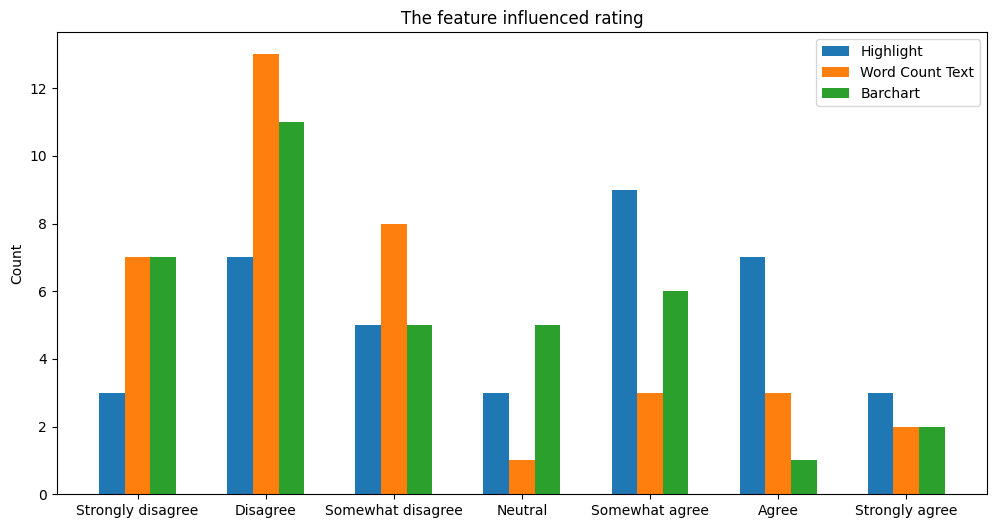

In [64]:
df_all_mitigation = pd.concat([df2,df4,df6,df8])


highlight = df_all_mitigation['WordHighlighting_influenced _rating'].value_counts()
wordcount = df_all_mitigation['WordCountText_influenced _rating'].value_counts()
barchart = df_all_mitigation['WordCountBarchart_influenced _rating'].value_counts()

values_highlight = []
values_wordcount = []
values_barchart = []
for option in options:
    values_highlight.append(highlight[option])
    values_wordcount.append(wordcount[option])
    values_barchart.append(barchart[option])

values_highlight = []
values_wordcount = []
values_barchart = []
for option in options:
    values_highlight.append(highlight[option])
    values_wordcount.append(wordcount[option])
    values_barchart.append(barchart[option])

x = np.arange(7)
width = 0.2

plt.figure(figsize=(12,6))
plt.bar(x, values_highlight, width)
plt.bar(x + width, values_wordcount, width)
plt.bar(x+ width*2, values_barchart, width)
plt.xticks(x + width, options_ticks)
plt.ylabel("Count")
plt.legend(["Highlight", "Word Count Text", "Barchart"])
plt.title('The feature influenced rating')
plt.savefig('Results/influence_rating_barchart')
plt.show()

#### Increased awareness of gender language

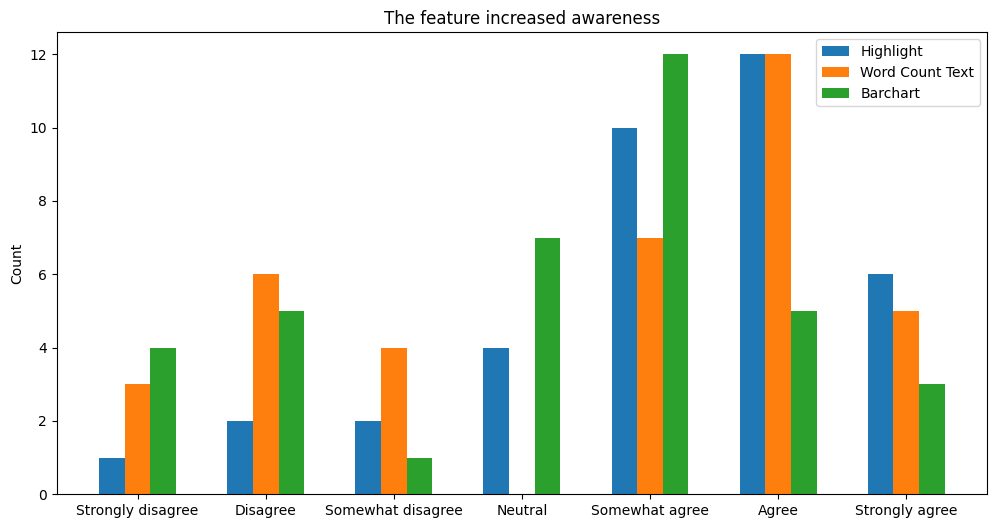

In [65]:
# Useful for increase awarness in gendered language
highlight = df_all_mitigation['WordHighlighting_awareness_gendered_language'].value_counts()
wordcount = df_all_mitigation['WordCountText_awareness_gendered_language'].value_counts()
barchart = df_all_mitigation['WordCountBarchart_awareness_gendered_language'].value_counts()

values_highlight = []
values_wordcount = []
values_barchart = []
for option in options:
    try:
        values_highlight.append(highlight[option])
    except:
        values_highlight.append(0)
    try:
        values_wordcount.append(wordcount[option])
    except:
        values_wordcount.append(0)
    try:
        values_barchart.append(barchart[option])
    except:
        values_barchart.append(0)

x = np.arange(7)
width = 0.2

plt.figure(figsize=(12,6))
plt.bar(x, values_highlight, width)
plt.bar(x + width, values_wordcount, width)
plt.bar(x+ width*2, values_barchart, width)
plt.xticks(x + width, options_ticks)
plt.ylabel("Count")
plt.legend(["Highlight", "Word Count Text", "Barchart"])
plt.title('The feature increased awareness')
plt.savefig('Results/increase_awareness_barchart')
plt.show()

#### Liked the feature

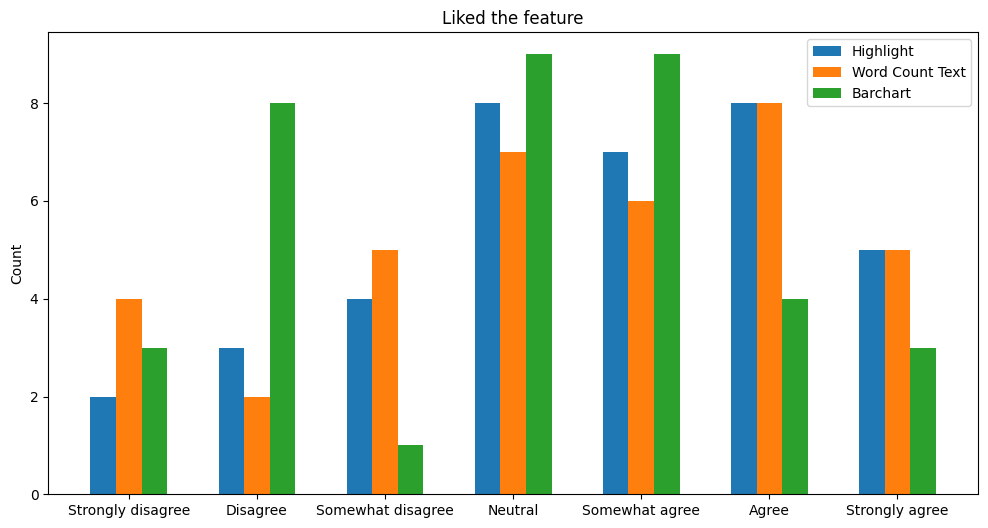

In [66]:
# Liked
highlight = df_all_mitigation['WordHighlighting_liked'].value_counts()
wordcount = df_all_mitigation['WordCountText_liked'].value_counts()
barchart = df_all_mitigation['WordCountBarchart_liked'].value_counts()

values_highlight = []
values_wordcount = []
values_barchart = []
for option in options:
    try:
        values_highlight.append(highlight[option])
    except:
        values_highlight.append(0)
    try:
        values_wordcount.append(wordcount[option])
    except:
        values_wordcount.append(0)
    try:
        values_barchart.append(barchart[option])
    except:
        values_barchart.append(0)

x = np.arange(7)
width = 0.2

plt.figure(figsize=(12,6))
plt.bar(x, values_highlight, width)
plt.bar(x + width, values_wordcount, width)
plt.bar(x+ width*2, values_barchart, width)
plt.xticks(x + width, options_ticks)
plt.ylabel("Count")
plt.legend(["Highlight", "Word Count Text", "Barchart"])
plt.title('Liked the feature')
plt.savefig('Results/liked_barchart')
plt.show()